# Weather Data Analysis with Dask

This notebook demonstrates weather data analysis using Dask with a synthetic dataset that mimics the **NOAA Global Historical Climatology Network (GHCN)** format.

## Dataset Information:
- **Source**: Synthetic data generated in this notebook
- **Time Period**: 2024 (1 year)
- **Stations**: 100 weather stations
- **Size**: ~90,000 observations (varies due to random precipitation)

**Data Columns**:
- `ID`: Station identifier (STATION_000 to STATION_099)
- `DATE`: Date of observation
- `ELEMENT`: Weather measurement type (TMAX, TMIN, PRCP)
  - TMAX: Maximum temperature (tenths of degrees C)
  - TMIN: Minimum temperature (tenths of degrees C)
  - PRCP: Precipitation (tenths of mm)
- `DATA_VALUE`: Measurement value
- `YEAR`: Year (2024)


## Setup

Import necessary libraries for data analysis.


In [2]:
import dask.dataframe as dd
import dask.array as da
from dask.distributed import Client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


## Initialize Dask Client

Create a local Dask client for parallel processing.


In [3]:
# Initialize a simple Dask client
# Using threads for simplicity - suitable for our synthetic dataset
try:
    client = Client(processes=False, n_workers=4, threads_per_worker=2)
    print("Dask client initialized successfully!")
    client
except Exception as e:
    print(f"Note: Could not start distributed client ({e})")
    print("Continuing with default scheduler (will still work for our examples)")


Dask client initialized successfully!


## Create Synthetic Weather Data

We'll create a synthetic weather dataset that mimics the NOAA GHCN format for demonstration purposes.


In [4]:
# For this tutorial, we'll create a synthetic weather dataset
# This demonstrates Dask capabilities without S3 dependencies

# Create synthetic weather data
import pandas as pd
from datetime import datetime, timedelta

# Generate sample data
dates = pd.date_range('2024-01-01', '2024-12-31', freq='D')
stations = [f'STATION_{i:03d}' for i in range(100)]

data_list = []
for station in stations:
    for date in dates:
        # Temperature data (TMAX, TMIN)
        data_list.append({
            'ID': station,
            'DATE': date,
            'ELEMENT': 'TMAX',
            'DATA_VALUE': np.random.randint(200, 350),  # tenths of degrees C
            'YEAR': date.year
        })
        data_list.append({
            'ID': station,
            'DATE': date,
            'ELEMENT': 'TMIN',
            'DATA_VALUE': np.random.randint(100, 250),
            'YEAR': date.year
        })
        # Precipitation data
        if np.random.random() > 0.5:  # 50% chance of precipitation
            data_list.append({
                'ID': station,
                'DATE': date,
                'ELEMENT': 'PRCP',
                'DATA_VALUE': np.random.randint(0, 500),  # tenths of mm
                'YEAR': date.year
            })

# Create Dask DataFrame from the synthetic data
weather_pd = pd.DataFrame(data_list)
weather = dd.from_pandas(weather_pd, npartitions=10)

print(f"Columns: {list(weather.columns)}")
print(f"Number of partitions: {weather.npartitions}")
print(f"Total records: {len(weather):,}")


Columns: ['ID', 'DATE', 'ELEMENT', 'DATA_VALUE', 'YEAR']
Number of partitions: 10
Total records: 91,385


## Explore the Data Structure


In [5]:
# Look at first few rows
print("Sample data:")
print(weather.head())

# Data types
print("\nData types:")
print(weather.dtypes)


Sample data:
            ID       DATE ELEMENT  DATA_VALUE  YEAR
0  STATION_000 2024-01-01    TMAX         214  2024
1  STATION_000 2024-01-01    TMIN         185  2024
2  STATION_000 2024-01-01    PRCP         328  2024
3  STATION_000 2024-01-02    TMAX         319  2024
4  STATION_000 2024-01-02    TMIN         210  2024

Data types:
ID            string[pyarrow]
DATE           datetime64[ns]
ELEMENT       string[pyarrow]
DATA_VALUE              int64
YEAR                    int64
dtype: object


## Analyze Weather Measurements

Common ELEMENT types in GHCN:
- **PRCP**: Precipitation (tenths of mm)
- **TMAX**: Maximum temperature (tenths of degrees C)
- **TMIN**: Minimum temperature (tenths of degrees C)
- **SNOW**: Snowfall (mm)
- **SNWD**: Snow depth (mm)
- **TAVG**: Average temperature
- And many more...


In [6]:
# Sample a subset for analysis to avoid memory issues
weather_sample = weather.sample(frac=0.01, random_state=42)

# Count observations by element type
element_counts = weather_sample.groupby('ELEMENT').size().compute().sort_values(ascending=False)
print("Top weather measurement types:")
print(element_counts.head(10))


Top weather measurement types:
ELEMENT
TMIN    388
TMAX    354
PRCP    168
dtype: int64


## Example Analysis: Temperature Trends

Let's analyze temperature data (TMAX/TMIN) from our synthetic dataset.


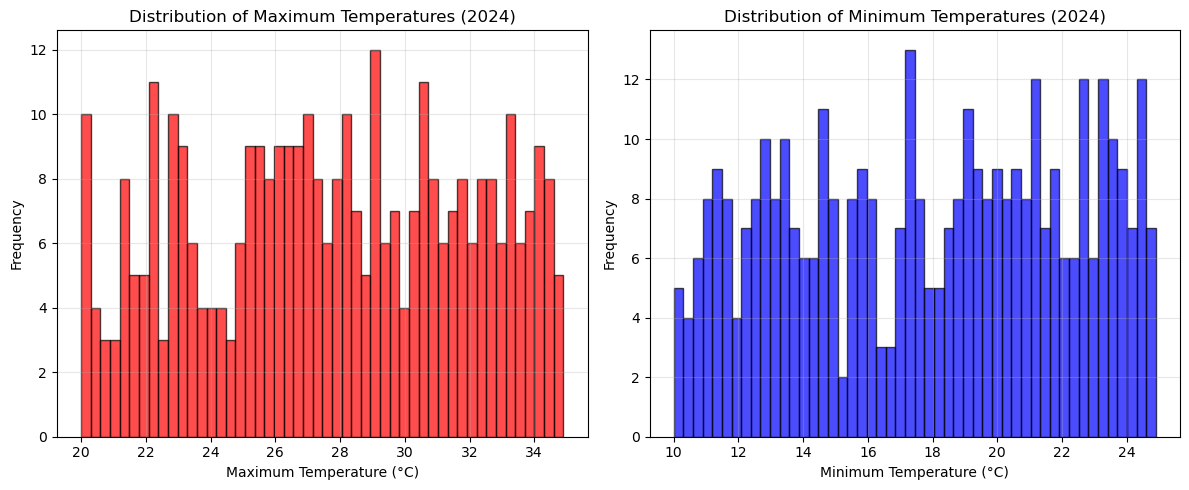

Sample size: 742 observations


In [7]:
# Filter for temperature data from the sample
temp_sample_data = weather_sample[weather_sample['ELEMENT'].isin(['TMAX', 'TMIN'])].compute()

# Convert DATA_VALUE to actual temperature (stored in tenths of degrees C)
temp_sample_data['TEMP_C'] = temp_sample_data['DATA_VALUE'] / 10.0

# Plot temperature distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
tmax = temp_sample_data[temp_sample_data['ELEMENT'] == 'TMAX']['TEMP_C']
plt.hist(tmax.dropna(), bins=50, edgecolor='black', alpha=0.7, color='red')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Temperatures (2024)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
tmin = temp_sample_data[temp_sample_data['ELEMENT'] == 'TMIN']['TEMP_C']
plt.hist(tmin.dropna(), bins=50, edgecolor='black', alpha=0.7, color='blue')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Temperatures (2024)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Sample size: {len(temp_sample_data):,} observations")


## Further Analysis

Add additional analysis code here to explore the weather dataset further.


In [8]:
# Example: Calculate statistics by station
# station_stats = weather.groupby('ID').agg({
#     'DATA_VALUE': ['mean', 'std', 'count']
# }).compute()

# Example: Filter by date range
# summer_data = weather[weather['DATE'].between('2024-06-01', '2024-08-31')]


In [9]:
# Load your data here
# Example:
# df = dd.read_csv('path/to/weather/data.csv')



## Data Exploration


In [10]:
# Explore the data



## Analysis


In [11]:
# Perform your analysis



## Visualization


In [12]:
# Create visualizations

